# Milestone 1

By: Maheswara Sinatriyo

Batch: HCK-001

## Problem Statement



**Conceptual Problem**

1. Apakah fungsi parameter criterion pada Decision Tree? Jelaskan salah satu criterion yang kalian pahami!
2. Apakah fungsi dari pruning pada Tree model?
3. Bagaimana cara memilih K yang optimal pada KNN?
4. Jelaskan apa yang kalian ketahui tentang Cross Valudation!
5. Jelaskan apa yang kalian ketahui tentang Accuracy, Precision, Recall, F1 score!

## Import Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import BaggingClassifier
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

## Data Loading

SQL

select limit_balance, sex, education_level, marital_status, age, pay_0, pay_2, pay_3, pay_4, pay_5, pay_6, bill_amt_1, bill_amt_2, bill_amt_3, bill_amt_4, bill_amt_5, bill_amt_6, pay_amt_1, pay_amt_2, pay_amt_3, pay_amt_4, pay_amt_5, pay_amt_6, default_payment_next_month from `bigquery-public-data.ml_datasets.credit_card_default`
limit 29985

In [2]:
# Data loading
df = pd.read_csv('credit_default.csv')
# Original backup
df_original = df.copy()
df

,limit_balance,sex,education_level,marital_status,age,pay_0,pay_2,pay_3,pay_4,pay_5,...,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6,default_payment_next_month
0,50000.0,1,1,2,39.0,0.0,0.0,0.0,0.0,0,...,50803.0,30789.0,15874.0,1800.0,2000.0,3000.0,2000.0,2000.0,2000.0,0
1,110000.0,2,1,2,29.0,0.0,0.0,0.0,0.0,0,...,32489.0,26354.0,20221.0,2000.0,2010.0,3000.0,3000.0,3000.0,1000.0,0
2,270000.0,1,1,2,36.0,0.0,0.0,0.0,2.0,0,...,40335.0,37165.0,22156.0,10076.0,4018.0,14.0,2051.0,2000.0,0.0,0
3,130000.0,1,1,1,45.0,0.0,0.0,0.0,0.0,0,...,62377.0,63832.0,65099.0,2886.0,2908.0,2129.0,2354.0,2366.0,2291.0,0
4,50000.0,1,1,2,24.0,0.0,0.0,0.0,0.0,0,...,19837.0,19855.0,20151.0,1367.0,1606.0,692.0,709.0,721.0,692.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2960,210000.0,2,2,1,39.0,-1.0,-1.0,-1.0,-1.0,-2,...,0.0,0.0,12000.0,0.0,28428.0,0.0,0.0,12000.0,33664.0,0
2961,280000.0,2,1,1,41.0,2.0,-1.0,-1.0,-1.0,-2,...,0.0,0.0,244.0,6859.0,486.0,0.0,0.0,244.0,0.0,0
2962,80000.0,1,1,2,28.0,1.0,-1.0,-1.0,-1.0,-2,...,0.0,0.0,0.0,47.0,207.0,0.0,0.0,0.0,0.0,0
2963,200000.0,1,2,1,53.0,1.0,-1.0,-1.0,-2.0,-2,...,0.0,0.0,6753.0,2920.0,0.0,0.0,0.0,6753.0,0.0,1


In [3]:
# General overview
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2965 entries, 0 to 2964
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   limit_balance               2965 non-null   float64
 1   sex                         2965 non-null   int64  
 2   education_level             2965 non-null   int64  
 3   marital_status              2965 non-null   int64  
 4   age                         2965 non-null   float64
 5   pay_0                       2965 non-null   float64
 6   pay_2                       2965 non-null   float64
 7   pay_3                       2965 non-null   float64
 8   pay_4                       2965 non-null   float64
 9   pay_5                       2965 non-null   int64  
 10  pay_6                       2965 non-null   int64  
 11  bill_amt_1                  2965 non-null   float64
 12  bill_amt_2                  2965 non-null   float64
 13  bill_amt_3                  2965 

all columns are numeric

In [4]:
# Null checking
df.isnull().sum()

limit_balance                 0
sex                           0
education_level               0
marital_status                0
age                           0
pay_0                         0
pay_2                         0
pay_3                         0
pay_4                         0
pay_5                         0
pay_6                         0
bill_amt_1                    0
bill_amt_2                    0
bill_amt_3                    0
bill_amt_4                    0
bill_amt_5                    0
bill_amt_6                    0
pay_amt_1                     0
pay_amt_2                     0
pay_amt_3                     0
pay_amt_4                     0
pay_amt_5                     0
pay_amt_6                     0
default_payment_next_month    0
dtype: int64

no missing values

In [5]:
# duplicated check
df.duplicated().sum()

1

In [6]:
# duplicate drop
df.drop_duplicates(inplace=True)

## EDA

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
limit_balance,2964.0,163356.950067,125049.701016,10000.0,50000.00,140000.0,230000.00,800000.0
sex,2964.0,1.607625,0.488362,1.0,1.00,2.0,2.00,2.0
education_level,2964.0,1.849865,0.778159,0.0,1.00,2.0,2.00,6.0
marital_status,2964.0,1.560054,0.522304,0.0,1.00,2.0,2.00,3.0
age,2964.0,35.193657,9.110949,21.0,28.00,34.0,41.00,69.0
pay_0,2964.0,0.004723,1.114434,-2.0,-1.00,0.0,0.00,8.0
pay_2,2964.0,-0.121795,1.180479,-2.0,-1.00,0.0,0.00,7.0
pay_3,2964.0,-0.141026,1.183337,-2.0,-1.00,0.0,0.00,7.0
pay_4,2964.0,-0.184548,1.178049,-2.0,-1.00,0.0,0.00,8.0
pay_5,2964.0,-0.224696,1.158739,-2.0,-1.00,0.0,0.00,7.0


It seems that the data has been encoded beforehand. sex, education_level, marital_status, and pay columns are categorical column that has been encoded/labeled

Columns pay_x seems to indicates the status of the payment by the user, there are also oddity in the column naming as the column start from pay_0 then skip to pay_2. Column pay_0 likely represent the first/initial payment status, thus we could change it to pay_1.

default_payment_next_month is our target features, we will shorten the name for ease of use

In [8]:
df.rename(columns={'pay_0':'pay_1'},inplace=True)
df.rename(columns={'default_payment_next_month':'default_pay'},inplace=True)

0    2329
1     635
Name: default_pay, dtype: int64


c:\Users\mahes\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


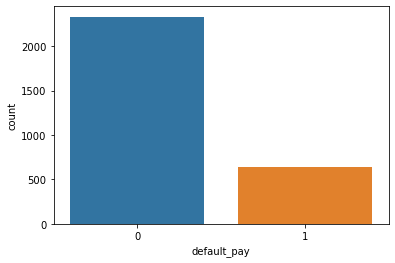

In [9]:
# default pay (target)

sns.countplot(df['default_pay'])
print(df['default_pay'].value_counts())

Based on the countplot, we can see that the data for default pay is not balanced. We will balance it later, by undersampling 0 to around 750 data so that the data would be more balanced without losing to much data

<AxesSubplot:>

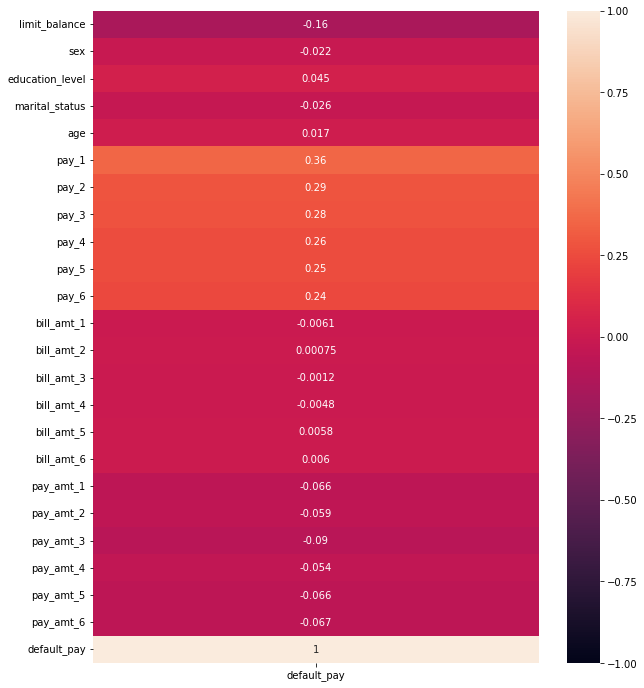

In [10]:
# Heatmap for numerical corelation
fig, ax = plt.subplots(figsize=(10,12))

sns.heatmap(df.corr()[['default_pay']], ax=ax, annot=True, vmin=-1, vmax=1)

based on the heatmap, the only corelation comes from pay_ columns, even though the corelation is not that big.

## Data Preprocessing

### Data split Inference

In [11]:
# Inference dataframe
df_inference = df.sample(10, random_state=21)
df_inference

,limit_balance,sex,education_level,marital_status,age,pay_1,pay_2,pay_3,pay_4,pay_5,...,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6,default_pay
136,470000.0,2,1,1,28.0,0.0,0.0,0.0,0.0,0,...,165014.0,158839.0,148035.0,6100.0,6000.0,7100.0,5100.0,5200.0,4900.0,0
1489,130000.0,2,2,2,24.0,0.0,0.0,0.0,0.0,-1,...,19057.0,2511.0,10358.0,10095.0,7005.0,6013.0,2511.0,10358.0,5000.0,0
991,30000.0,2,1,2,27.0,0.0,0.0,0.0,0.0,0,...,22544.0,24061.0,23428.0,2000.0,3000.0,2000.0,2000.0,1000.0,0.0,1
1517,410000.0,1,1,2,32.0,-1.0,0.0,-1.0,-1.0,-1,...,623.0,4695.0,4133.0,10000.0,7764.0,623.0,4695.0,5973.0,4421.0,0
2091,290000.0,1,2,1,50.0,1.0,-2.0,-2.0,-2.0,-2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2400,200000.0,2,1,2,29.0,-1.0,-1.0,-1.0,0.0,0,...,29313.0,49113.0,732.0,0.0,9781.0,20000.0,20000.0,732.0,1005.0,0
2707,230000.0,1,1,2,27.0,-1.0,-1.0,-1.0,-1.0,-1,...,2007.0,2104.0,394.0,7662.0,2066.0,2007.0,2108.0,394.0,3214.0,0
1504,140000.0,2,2,2,32.0,-1.0,0.0,0.0,0.0,-1,...,7453.0,38415.0,31685.0,1231.0,1262.0,1000.0,38415.0,4000.0,4000.0,0
1130,50000.0,1,1,1,47.0,0.0,0.0,0.0,0.0,0,...,53561.0,53283.0,53057.0,2657.0,2743.0,2668.0,1712.0,1762.0,1894.0,0
1463,200000.0,1,3,2,31.0,0.0,0.0,0.0,-2.0,-1,...,1201.0,1200.0,0.0,1050.0,0.0,1302.0,100.0,0.0,0.0,0


In [12]:
# Dataframe without Inference
df_train_test = df.drop(df_inference.index)
df_train_test

,limit_balance,sex,education_level,marital_status,age,pay_1,pay_2,pay_3,pay_4,pay_5,...,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6,default_pay
0,50000.0,1,1,2,39.0,0.0,0.0,0.0,0.0,0,...,50803.0,30789.0,15874.0,1800.0,2000.0,3000.0,2000.0,2000.0,2000.0,0
1,110000.0,2,1,2,29.0,0.0,0.0,0.0,0.0,0,...,32489.0,26354.0,20221.0,2000.0,2010.0,3000.0,3000.0,3000.0,1000.0,0
2,270000.0,1,1,2,36.0,0.0,0.0,0.0,2.0,0,...,40335.0,37165.0,22156.0,10076.0,4018.0,14.0,2051.0,2000.0,0.0,0
3,130000.0,1,1,1,45.0,0.0,0.0,0.0,0.0,0,...,62377.0,63832.0,65099.0,2886.0,2908.0,2129.0,2354.0,2366.0,2291.0,0
4,50000.0,1,1,2,24.0,0.0,0.0,0.0,0.0,0,...,19837.0,19855.0,20151.0,1367.0,1606.0,692.0,709.0,721.0,692.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2960,210000.0,2,2,1,39.0,-1.0,-1.0,-1.0,-1.0,-2,...,0.0,0.0,12000.0,0.0,28428.0,0.0,0.0,12000.0,33664.0,0
2961,280000.0,2,1,1,41.0,2.0,-1.0,-1.0,-1.0,-2,...,0.0,0.0,244.0,6859.0,486.0,0.0,0.0,244.0,0.0,0
2962,80000.0,1,1,2,28.0,1.0,-1.0,-1.0,-1.0,-2,...,0.0,0.0,0.0,47.0,207.0,0.0,0.0,0.0,0.0,0
2963,200000.0,1,2,1,53.0,1.0,-1.0,-1.0,-2.0,-2,...,0.0,0.0,6753.0,2920.0,0.0,0.0,0.0,6753.0,0.0,1


In [13]:
# Drop index
df_inference.reset_index(inplace=True,drop=True)
df_train_test.reset_index(inplace=True,drop=True)
df_inference

,limit_balance,sex,education_level,marital_status,age,pay_1,pay_2,pay_3,pay_4,pay_5,...,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6,default_pay
0,470000.0,2,1,1,28.0,0.0,0.0,0.0,0.0,0,...,165014.0,158839.0,148035.0,6100.0,6000.0,7100.0,5100.0,5200.0,4900.0,0
1,130000.0,2,2,2,24.0,0.0,0.0,0.0,0.0,-1,...,19057.0,2511.0,10358.0,10095.0,7005.0,6013.0,2511.0,10358.0,5000.0,0
2,30000.0,2,1,2,27.0,0.0,0.0,0.0,0.0,0,...,22544.0,24061.0,23428.0,2000.0,3000.0,2000.0,2000.0,1000.0,0.0,1
3,410000.0,1,1,2,32.0,-1.0,0.0,-1.0,-1.0,-1,...,623.0,4695.0,4133.0,10000.0,7764.0,623.0,4695.0,5973.0,4421.0,0
4,290000.0,1,2,1,50.0,1.0,-2.0,-2.0,-2.0,-2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
5,200000.0,2,1,2,29.0,-1.0,-1.0,-1.0,0.0,0,...,29313.0,49113.0,732.0,0.0,9781.0,20000.0,20000.0,732.0,1005.0,0
6,230000.0,1,1,2,27.0,-1.0,-1.0,-1.0,-1.0,-1,...,2007.0,2104.0,394.0,7662.0,2066.0,2007.0,2108.0,394.0,3214.0,0
7,140000.0,2,2,2,32.0,-1.0,0.0,0.0,0.0,-1,...,7453.0,38415.0,31685.0,1231.0,1262.0,1000.0,38415.0,4000.0,4000.0,0
8,50000.0,1,1,1,47.0,0.0,0.0,0.0,0.0,0,...,53561.0,53283.0,53057.0,2657.0,2743.0,2668.0,1712.0,1762.0,1894.0,0
9,200000.0,1,3,2,31.0,0.0,0.0,0.0,-2.0,-1,...,1201.0,1200.0,0.0,1050.0,0.0,1302.0,100.0,0.0,0.0,0


### Train Test Split

In [14]:
# X (features), y (target)

X = df_train_test.drop('default_pay',axis=1)
y = df_train_test['default_pay']
X

,limit_balance,sex,education_level,marital_status,age,pay_1,pay_2,pay_3,pay_4,pay_5,...,bill_amt_3,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6
0,50000.0,1,1,2,39.0,0.0,0.0,0.0,0.0,0,...,48630.0,50803.0,30789.0,15874.0,1800.0,2000.0,3000.0,2000.0,2000.0,2000.0
1,110000.0,2,1,2,29.0,0.0,0.0,0.0,0.0,0,...,44231.0,32489.0,26354.0,20221.0,2000.0,2010.0,3000.0,3000.0,3000.0,1000.0
2,270000.0,1,1,2,36.0,0.0,0.0,0.0,2.0,0,...,46512.0,40335.0,37165.0,22156.0,10076.0,4018.0,14.0,2051.0,2000.0,0.0
3,130000.0,1,1,1,45.0,0.0,0.0,0.0,0.0,0,...,61156.0,62377.0,63832.0,65099.0,2886.0,2908.0,2129.0,2354.0,2366.0,2291.0
4,50000.0,1,1,2,24.0,0.0,0.0,0.0,0.0,0,...,22110.0,19837.0,19855.0,20151.0,1367.0,1606.0,692.0,709.0,721.0,692.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2949,210000.0,2,2,1,39.0,-1.0,-1.0,-1.0,-1.0,-2,...,28428.0,0.0,0.0,12000.0,0.0,28428.0,0.0,0.0,12000.0,33664.0
2950,280000.0,2,1,1,41.0,2.0,-1.0,-1.0,-1.0,-2,...,486.0,0.0,0.0,244.0,6859.0,486.0,0.0,0.0,244.0,0.0
2951,80000.0,1,1,2,28.0,1.0,-1.0,-1.0,-1.0,-2,...,207.0,0.0,0.0,0.0,47.0,207.0,0.0,0.0,0.0,0.0
2952,200000.0,1,2,1,53.0,1.0,-1.0,-1.0,-2.0,-2,...,0.0,0.0,0.0,6753.0,2920.0,0.0,0.0,0.0,6753.0,0.0


In [15]:
# Train Test set

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=21)

print('Train Size : ', X_train.shape)
print('Test Size : ', X_test.shape)

Train Size :  (2363, 23)
Test Size :  (591, 23)


In [16]:
# Reset index
X_train.reset_index(inplace=True,drop=True)
X_test.reset_index(inplace=True,drop=True)
y_train.reset_index(inplace=True,drop=True)
y_test.reset_index(inplace=True,drop=True)

In [17]:
X_train.isnull().sum()

limit_balance      0
sex                0
education_level    0
marital_status     0
age                0
pay_1              0
pay_2              0
pay_3              0
pay_4              0
pay_5              0
pay_6              0
bill_amt_1         0
bill_amt_2         0
bill_amt_3         0
bill_amt_4         0
bill_amt_5         0
bill_amt_6         0
pay_amt_1          0
pay_amt_2          0
pay_amt_3          0
pay_amt_4          0
pay_amt_5          0
pay_amt_6          0
dtype: int64

In [18]:
X_test.isnull().sum()

limit_balance      0
sex                0
education_level    0
marital_status     0
age                0
pay_1              0
pay_2              0
pay_3              0
pay_4              0
pay_5              0
pay_6              0
bill_amt_1         0
bill_amt_2         0
bill_amt_3         0
bill_amt_4         0
bill_amt_5         0
bill_amt_6         0
pay_amt_1          0
pay_amt_2          0
pay_amt_3          0
pay_amt_4          0
pay_amt_5          0
pay_amt_6          0
dtype: int64

### EDA 2 for Feature Selection

In [19]:
# concate X and y to temporary df for EDA
X_temp = X_train.copy()
y_temp = pd.DataFrame(y_train.copy(), columns=['default_pay'])
tdf = pd.concat([X_temp,y_temp],axis=1)
tdf.reset_index(inplace=True,drop=True)

In [20]:
tdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2363 entries, 0 to 2362
Data columns (total 24 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   limit_balance    2363 non-null   float64
 1   sex              2363 non-null   int64  
 2   education_level  2363 non-null   int64  
 3   marital_status   2363 non-null   int64  
 4   age              2363 non-null   float64
 5   pay_1            2363 non-null   float64
 6   pay_2            2363 non-null   float64
 7   pay_3            2363 non-null   float64
 8   pay_4            2363 non-null   float64
 9   pay_5            2363 non-null   int64  
 10  pay_6            2363 non-null   int64  
 11  bill_amt_1       2363 non-null   float64
 12  bill_amt_2       2363 non-null   float64
 13  bill_amt_3       2363 non-null   float64
 14  bill_amt_4       2363 non-null   float64
 15  bill_amt_5       2363 non-null   float64
 16  bill_amt_6       2363 non-null   float64
 17  pay_amt_1     

In [21]:
# null check
tdf.isnull().sum()

limit_balance      0
sex                0
education_level    0
marital_status     0
age                0
pay_1              0
pay_2              0
pay_3              0
pay_4              0
pay_5              0
pay_6              0
bill_amt_1         0
bill_amt_2         0
bill_amt_3         0
bill_amt_4         0
bill_amt_5         0
bill_amt_6         0
pay_amt_1          0
pay_amt_2          0
pay_amt_3          0
pay_amt_4          0
pay_amt_5          0
pay_amt_6          0
default_pay        0
dtype: int64

### Feature Selection

<AxesSubplot:>

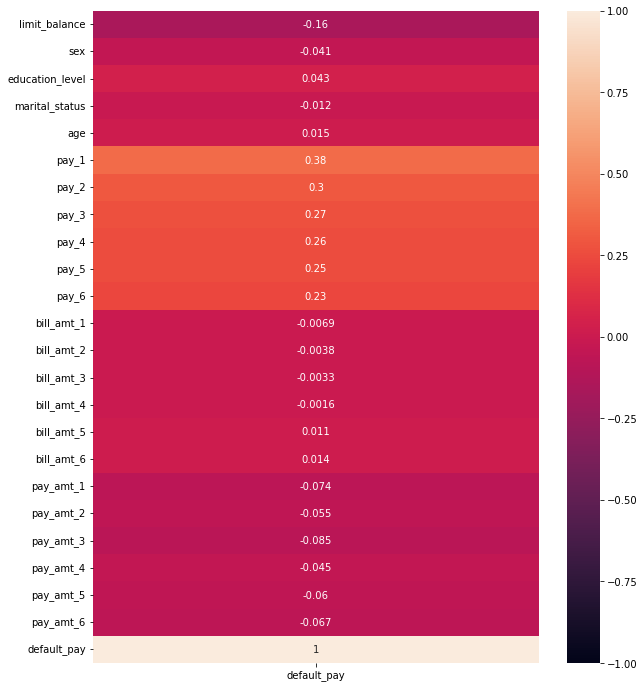

In [22]:
# Heatmap for numerical corelation
fig, ax = plt.subplots(figsize=(10,12))

sns.heatmap(tdf.corr()[['default_pay']], ax=ax, annot=True, vmin=-1, vmax=1)

Since the data has been split, there are slight changes in the corelation heatmap. But overall, pay_x columns are the only corelations, thus we will be using those as features

In [23]:
# dropping unused features

X_train = X_train[['pay_1','pay_2','pay_3','pay_4','pay_5','pay_6']]
X_test = X_test[['pay_1','pay_2','pay_3','pay_4','pay_5','pay_6']]
X_train.reset_index(inplace=True,drop=True)
X_test.reset_index(inplace=True,drop=True)
X_train

,pay_1,pay_2,pay_3,pay_4,pay_5,pay_6
0,0.0,0.0,0.0,0.0,0,0
1,0.0,0.0,0.0,0.0,0,0
2,0.0,0.0,-1.0,-1.0,-1,-1
3,-2.0,-2.0,-2.0,-2.0,-2,-2
4,1.0,2.0,3.0,2.0,0,0
...,...,...,...,...,...,...
2358,0.0,-1.0,0.0,0.0,0,0
2359,0.0,0.0,0.0,0.0,0,-2
2360,0.0,0.0,0.0,0.0,0,0
2361,3.0,2.0,0.0,0.0,2,3


### Null Check

In [24]:
X_train.isnull().sum()

pay_1    0
pay_2    0
pay_3    0
pay_4    0
pay_5    0
pay_6    0
dtype: int64

In [25]:
X_test.isnull().sum()

pay_1    0
pay_2    0
pay_3    0
pay_4    0
pay_5    0
pay_6    0
dtype: int64

In [26]:
y_train.isnull().sum()

0

In [27]:
y_test.isnull().sum()

0

### Train Balancing

In [28]:
X_train

,pay_1,pay_2,pay_3,pay_4,pay_5,pay_6
0,0.0,0.0,0.0,0.0,0,0
1,0.0,0.0,0.0,0.0,0,0
2,0.0,0.0,-1.0,-1.0,-1,-1
3,-2.0,-2.0,-2.0,-2.0,-2,-2
4,1.0,2.0,3.0,2.0,0,0
...,...,...,...,...,...,...
2358,0.0,-1.0,0.0,0.0,0,0
2359,0.0,0.0,0.0,0.0,0,-2
2360,0.0,0.0,0.0,0.0,0,0
2361,3.0,2.0,0.0,0.0,2,3


In [29]:
under_sampler = RandomUnderSampler(sampling_strategy={0:750},random_state=21)
X_train, y_train = under_sampler.fit_resample(X_train, y_train)

c:\Users\mahes\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='default_pay', ylabel='count'>

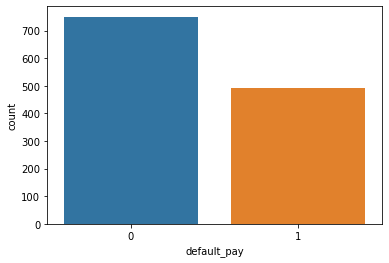

In [30]:
sns.countplot(y_train)

Now the data has been balanced

## Model Definition

Algorithm : Logistic Regression, SVM, Decision Tree, Random Forest, KNN, Naive Bayes, and Bagging meta-estimator

Metrics : Classification Report, Cross Valiadtion

## Model Training

### Logistic Regression

In [31]:
# Logistic Regression
model_log_reg = LogisticRegression(random_state=21)
model_log_reg.fit(X_train,y_train)

LogisticRegression(random_state=21)

### SVM

In [32]:
# SVM (SVC)
model_svc = SVC(random_state=21)
model_svc.fit(X_train,y_train)

SVC(random_state=21)

### Decision Tree

In [33]:
# Decision Tree
model_tree = DecisionTreeClassifier(random_state=21)
model_tree.fit(X_train,y_train)

DecisionTreeClassifier(random_state=21)

### Random Forest

In [34]:
# Random Forest
model_forest = RandomForestClassifier(random_state=21)
model_forest.fit(X_train,y_train)

RandomForestClassifier(random_state=21)

### K Nearest Neighbor

In [35]:
# KNN
model_knn = KNeighborsClassifier(n_neighbors=1)
model_knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=1)

### Naive Bayes

In [36]:
# Naive Bayes
model_bayes = GaussianNB()
model_bayes.fit(X_train,y_train)

GaussianNB()

### Bagging Classifier Using Decision Tree

In [37]:
# Bagging Classifier Decision Tree
model_bag = BaggingClassifier(
    DecisionTreeClassifier(random_state=21))
model_bag.fit(X_train,y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(random_state=21))

## Model Evaluation

In [38]:
# Empty list for later

Alg = []
Avg = []
Std = []

Before we dive in further, it is to be noted that we want to minimze the result of False Negative (1 predicted as 0). That is why we will be checking at the recall values. We do this because we dont want someone who is supposed to be default (has not completed payment) to keep using their credit card, if it happens then the user will have much more difficulties on clearing their debt and the bank must deal with the money that has not been paid bakc yet.

Minimizing False positive is also important, since user who has paid their debt might have their card still declined. But it is not as fatal as having False Negative, since False Positive user can reconfirm their status to the bank to get their default lifted.

### Logistic Regression

In [39]:
# Cross Valiadtion
scores_log = cross_val_score(model_log_reg, X_train, y_train, cv=5, scoring='recall')
print('RECALL')
print('Cross Validation : ', scores_log)
print('Cross Validation Mean : ', scores_log.mean())
print('Cross Validation Std : ', scores_log.std())
Alg.append('Logistic')
Avg.append(scores_log.mean())
Std.append(scores_log.std())

RECALL
Cross Validation :  [0.42424242 0.44897959 0.47959184 0.55102041 0.57142857]
Cross Validation Mean :  0.4950525664811378
Cross Validation Std :  0.05716908751244735


### SVM

In [40]:
# Cross Valiadtion
scores_svm = cross_val_score(model_svc, X_train, y_train, cv=5, scoring='recall')
print('RECALL')
print('Cross Validation : ', scores_svm)
print('Cross Validation Mean : ', scores_svm.mean())
print('Cross Validation Std : ', scores_svm.std())
Alg.append('SVM')
Avg.append(scores_svm.mean())
Std.append(scores_svm.std())

RECALL
Cross Validation :  [0.48484848 0.48979592 0.47959184 0.59183673 0.58163265]
Cross Validation Mean :  0.5255411255411255
Cross Validation Std :  0.05017233348515106


### Decision Tree

In [41]:
# Cross Valiadtion
scores_tree = cross_val_score(model_tree, X_train, y_train, cv=5, scoring='recall')
print('RECALL')
print('Cross Validation : ', scores_tree)
print('Cross Validation Mean : ', scores_tree.mean())
print('Cross Validation Std : ', scores_tree.std())
Alg.append('Decision Tree')
Avg.append(scores_tree.mean())
Std.append(scores_tree.std())

RECALL
Cross Validation :  [0.47474747 0.44897959 0.47959184 0.60204082 0.51020408]
Cross Validation Mean :  0.5031127602556174
Cross Validation Std :  0.053151237624621414


### Random Forest

In [42]:
# Cross Valiadtion
scores_forest = cross_val_score(model_forest, X_train, y_train, cv=5, scoring='recall')
print('RECALL')
print('Cross Validation : ', scores_forest)
print('Cross Validation Mean : ', scores_forest.mean())
print('Cross Validation Std : ', scores_forest.std())
Alg.append('Random Forest')
Avg.append(scores_forest.mean())
Std.append(scores_forest.std())

RECALL
Cross Validation :  [0.49494949 0.45918367 0.5        0.64285714 0.56122449]
Cross Validation Mean :  0.5316429602143888
Cross Validation Std :  0.06456267787684836


### K Nearest Neighbor

In [43]:
# Cross Valiadtion
scores_knn = cross_val_score(model_knn, X_train, y_train, cv=5, scoring='recall')
print('RECALL')
print('Cross Validation : ', scores_knn)
print('Cross Validation Mean : ', scores_knn.mean())
print('Cross Validation Std : ', scores_knn.std())
Alg.append('KNN')
Avg.append(scores_knn.mean())
Std.append(scores_knn.std())

RECALL
Cross Validation :  [0.2020202  0.26530612 0.2244898  0.28571429 0.23469388]
Cross Validation Mean :  0.24244485673057103
Cross Validation Std :  0.029703520162730642


### Naive Bayes

In [44]:
# Cross Valiadtion
scores_bayes = cross_val_score(model_bayes, X_train, y_train, cv=5, scoring='recall')
print('RECALL')
print('Cross Validation : ', scores_bayes)
print('Cross Validation Mean : ', scores_bayes.mean())
print('Cross Validation Std : ', scores_bayes.std())
Alg.append('Naive Bayes')
Avg.append(scores_bayes.mean())
Std.append(scores_bayes.std())

RECALL
Cross Validation :  [0.49494949 0.43877551 0.44897959 0.51020408 0.56122449]
Cross Validation Mean :  0.4908266336837765
Cross Validation Std :  0.0442918412036802


### Bagging Classifier Using Decision Tree

In [45]:
# Cross Valiadtion
scores_bag = cross_val_score(model_bag, X_train, y_train, cv=5, scoring='recall')
print('RECALL')
print('Cross Validation : ', scores_bag)
print('Cross Validation Mean : ', scores_bag.mean())
print('Cross Validation Std : ', scores_bag.std())
Alg.append('Bagging')
Avg.append(scores_bag.mean())
Std.append(scores_bag.std())

RECALL
Cross Validation :  [0.46464646 0.43877551 0.53061224 0.6122449  0.54081633]
Cross Validation Mean :  0.5174190888476603
Cross Validation Std :  0.06112804020801669


### Comparison

In [46]:
d = {'Average': Avg, 'std': Std}
pd.DataFrame(data=d,index=Alg)

,Average,std
Logistic,0.495053,0.057169
SVM,0.525541,0.050172
Decision Tree,0.503113,0.053151
Random Forest,0.531643,0.064563
KNN,0.242445,0.029704
Naive Bayes,0.490827,0.044292
Bagging,0.517419,0.061128


Overall from all the model, Random Forest has the highest recall average over the other algorithm. The std for most algorithm are similar. But there are not any good recall result from any algorithm since all the results are below 0.6. Moving onwards we will be using Random Forest

Overall from all the model evaluation, Bagging Using Decision Tree has the highest recall average over the other algorithm while also having the lowest standard deviation. Although there are not any good recall result from every algorithm since the results are below 0.6

### Grid Search

In [47]:
param_grid = {'criterion':["gini","entropy"],'n_estimators':[100,500,1000,10000]}

In [48]:
grid = GridSearchCV(RandomForestClassifier(),param_grid,verbose=3,scoring='recall')

In [49]:
grid.fit(X_train,y_train)

Fitting 5 folds for each of 8 candidates, totalling 40 fits
[CV 1/5] END ..criterion=gini, n_estimators=100;, score=0.485 total time=   0.0s
[CV 2/5] END ..criterion=gini, n_estimators=100;, score=0.459 total time=   0.0s
[CV 3/5] END ..criterion=gini, n_estimators=100;, score=0.510 total time=   0.0s
[CV 4/5] END ..criterion=gini, n_estimators=100;, score=0.622 total time=   0.0s
[CV 5/5] END ..criterion=gini, n_estimators=100;, score=0.582 total time=   0.0s
[CV 1/5] END ..criterion=gini, n_estimators=500;, score=0.515 total time=   0.3s
[CV 2/5] END ..criterion=gini, n_estimators=500;, score=0.459 total time=   0.3s
[CV 3/5] END ..criterion=gini, n_estimators=500;, score=0.520 total time=   0.3s
[CV 4/5] END ..criterion=gini, n_estimators=500;, score=0.633 total time=   0.3s
[CV 5/5] END ..criterion=gini, n_estimators=500;, score=0.582 total time=   0.3s
[CV 1/5] END .criterion=gini, n_estimators=1000;, score=0.475 total time=   0.8s
[CV 2/5] END .criterion=gini, n_estimators=1000;,

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'n_estimators': [100, 500, 1000, 10000]},
             scoring='recall', verbose=3)

In [50]:
# best parameter
grid.best_params_

{'criterion': 'gini', 'n_estimators': 500}

In [51]:
# best estimator
grid_best = grid.best_estimator_
grid.best_estimator_

RandomForestClassifier(n_estimators=500)

In [52]:
# best score
grid.best_score_

0.5418058132343846

we will use these paramters for our final best model

### Final Model (Random Forest)

#### Initial

we run our base initial SVM model to later compare with our final best model

In [53]:
# Predict Train-Set and Test-Set 
forest_pred_train = model_forest.predict(X_train)
forest_pred_test = model_forest.predict(X_test)

In [54]:
# Train classification report
print('Classification Report : \n', classification_report(y_train,forest_pred_train))

Classification Report : 
               precision    recall  f1-score   support

           0       0.79      0.94      0.86       750
           1       0.88      0.61      0.72       491

    accuracy                           0.81      1241
   macro avg       0.83      0.78      0.79      1241
weighted avg       0.82      0.81      0.80      1241



In [55]:
# Train classification report
print('Classification Report : \n', classification_report(y_test,forest_pred_test))

Classification Report : 
               precision    recall  f1-score   support

           0       0.85      0.89      0.87       448
           1       0.59      0.51      0.55       143

    accuracy                           0.80       591
   macro avg       0.72      0.70      0.71       591
weighted avg       0.79      0.80      0.79       591



The base model is good at correctly predicting 0 (recall) and is fit because the diference between test and train is less than 0.05, but is very bad at maximining 1 prediction (recall) and also unfit since the difference is 0.09

#### Best

In [56]:
# Predict Train-Set and Test-Set 
forest_best_pred_train = grid_best.predict(X_train)
forest_best_pred_test = grid_best.predict(X_test)

In [57]:
# Train classification report
print('Classification Report : \n', classification_report(y_train,forest_best_pred_train))

Classification Report : 
               precision    recall  f1-score   support

           0       0.78      0.95      0.86       750
           1       0.89      0.60      0.72       491

    accuracy                           0.81      1241
   macro avg       0.84      0.78      0.79      1241
weighted avg       0.83      0.81      0.80      1241



In [58]:
# Test classification report
print('Classification Report : \n', classification_report(y_test, forest_best_pred_test), '\n')

Classification Report : 
               precision    recall  f1-score   support

           0       0.85      0.90      0.87       448
           1       0.61      0.49      0.54       143

    accuracy                           0.80       591
   macro avg       0.73      0.70      0.71       591
weighted avg       0.79      0.80      0.79       591
 



In [59]:
# Cross Valiadtion
scores = cross_val_score(grid_best, X_train, y_train, cv=5, scoring='recall')
print('RECALL')
print('Cross Validation : ', scores)
print('Cross Validation Mean : ', scores.mean())

RECALL
Cross Validation :  [0.49494949 0.45918367 0.51020408 0.62244898 0.57142857]
Cross Validation Mean :  0.5316429602143888


After using the best parameter from hyperparameter tuning, the only slightly change for both test and train positive (1) and negative (0) values. But the model for positive recall is still not fit as the difference between the positive test and train is around 0.09 for both model. We can say that the base parameter is already good enough since there is barely any difference after hyperparameter tuning. Thus the recall values even after tuning is still low, making the model unuseable. One possible cuase is that the data for default (1) and non default (0) is initially not balanced

## Model Inference

In [60]:
# Display Inference-Set 

df_inference

,limit_balance,sex,education_level,marital_status,age,pay_1,pay_2,pay_3,pay_4,pay_5,...,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6,default_pay
0,470000.0,2,1,1,28.0,0.0,0.0,0.0,0.0,0,...,165014.0,158839.0,148035.0,6100.0,6000.0,7100.0,5100.0,5200.0,4900.0,0
1,130000.0,2,2,2,24.0,0.0,0.0,0.0,0.0,-1,...,19057.0,2511.0,10358.0,10095.0,7005.0,6013.0,2511.0,10358.0,5000.0,0
2,30000.0,2,1,2,27.0,0.0,0.0,0.0,0.0,0,...,22544.0,24061.0,23428.0,2000.0,3000.0,2000.0,2000.0,1000.0,0.0,1
3,410000.0,1,1,2,32.0,-1.0,0.0,-1.0,-1.0,-1,...,623.0,4695.0,4133.0,10000.0,7764.0,623.0,4695.0,5973.0,4421.0,0
4,290000.0,1,2,1,50.0,1.0,-2.0,-2.0,-2.0,-2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
5,200000.0,2,1,2,29.0,-1.0,-1.0,-1.0,0.0,0,...,29313.0,49113.0,732.0,0.0,9781.0,20000.0,20000.0,732.0,1005.0,0
6,230000.0,1,1,2,27.0,-1.0,-1.0,-1.0,-1.0,-1,...,2007.0,2104.0,394.0,7662.0,2066.0,2007.0,2108.0,394.0,3214.0,0
7,140000.0,2,2,2,32.0,-1.0,0.0,0.0,0.0,-1,...,7453.0,38415.0,31685.0,1231.0,1262.0,1000.0,38415.0,4000.0,4000.0,0
8,50000.0,1,1,1,47.0,0.0,0.0,0.0,0.0,0,...,53561.0,53283.0,53057.0,2657.0,2743.0,2668.0,1712.0,1762.0,1894.0,0
9,200000.0,1,3,2,31.0,0.0,0.0,0.0,-2.0,-1,...,1201.0,1200.0,0.0,1050.0,0.0,1302.0,100.0,0.0,0.0,0


In [61]:
# Inference Feature selection
df_inference_fin = df_inference[['pay_1','pay_2','pay_3','pay_4','pay_5','pay_6']]
df_inference_fin

,pay_1,pay_2,pay_3,pay_4,pay_5,pay_6
0,0.0,0.0,0.0,0.0,0,0
1,0.0,0.0,0.0,0.0,-1,-1
2,0.0,0.0,0.0,0.0,0,2
3,-1.0,0.0,-1.0,-1.0,-1,-1
4,1.0,-2.0,-2.0,-2.0,-2,-2
5,-1.0,-1.0,-1.0,0.0,0,-1
6,-1.0,-1.0,-1.0,-1.0,-1,-1
7,-1.0,0.0,0.0,0.0,-1,0
8,0.0,0.0,0.0,0.0,0,0
9,0.0,0.0,0.0,-2.0,-1,0


In [62]:
# Predict using SVM

y_pred_svc = grid_best.predict(df_inference_fin)
y_pred_svc_df = pd.DataFrame(y_pred_svc,columns=['Prediction'])

In [63]:
# concat prediction and inference

pd.concat([df_inference, y_pred_svc_df], axis=1)

,limit_balance,sex,education_level,marital_status,age,pay_1,pay_2,pay_3,pay_4,pay_5,...,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6,default_pay,Prediction
0,470000.0,2,1,1,28.0,0.0,0.0,0.0,0.0,0,...,158839.0,148035.0,6100.0,6000.0,7100.0,5100.0,5200.0,4900.0,0,0
1,130000.0,2,2,2,24.0,0.0,0.0,0.0,0.0,-1,...,2511.0,10358.0,10095.0,7005.0,6013.0,2511.0,10358.0,5000.0,0,0
2,30000.0,2,1,2,27.0,0.0,0.0,0.0,0.0,0,...,24061.0,23428.0,2000.0,3000.0,2000.0,2000.0,1000.0,0.0,1,1
3,410000.0,1,1,2,32.0,-1.0,0.0,-1.0,-1.0,-1,...,4695.0,4133.0,10000.0,7764.0,623.0,4695.0,5973.0,4421.0,0,0
4,290000.0,1,2,1,50.0,1.0,-2.0,-2.0,-2.0,-2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0
5,200000.0,2,1,2,29.0,-1.0,-1.0,-1.0,0.0,0,...,49113.0,732.0,0.0,9781.0,20000.0,20000.0,732.0,1005.0,0,0
6,230000.0,1,1,2,27.0,-1.0,-1.0,-1.0,-1.0,-1,...,2104.0,394.0,7662.0,2066.0,2007.0,2108.0,394.0,3214.0,0,0
7,140000.0,2,2,2,32.0,-1.0,0.0,0.0,0.0,-1,...,38415.0,31685.0,1231.0,1262.0,1000.0,38415.0,4000.0,4000.0,0,0
8,50000.0,1,1,1,47.0,0.0,0.0,0.0,0.0,0,...,53283.0,53057.0,2657.0,2743.0,2668.0,1712.0,1762.0,1894.0,0,0
9,200000.0,1,3,2,31.0,0.0,0.0,0.0,-2.0,-1,...,1200.0,0.0,1050.0,0.0,1302.0,100.0,0.0,0.0,0,0


## Conclusion

In conclusion, from the EDA we found out that the categoric data has been encoded/labeled beforehand. Based on the heatmap and furhter EDA only pay_ columns has corelation with default_pay, thus pay_ columns becomes our features. The model used in this notebook are:Logistic Regression, SVM, Decision Tree, Random Forest, KNN, Naive Bayes, and Bagging meta-estimator, with classification report and cross validation as the metrics. 

Since we want to minimize wrong prediction of default (1), then we are going to prioritize the recall value for 1. Based on the cross validation, Random Forest has the best average recall result and since most std is very similar we can ignore the std. Thus Random Forest is the chosen model in this notebook.

After hyperparameter tuning of Random Forest, the model are run again (both the default and the one with  best paramter) to see the difference. The result were only slightly diffrent, likely the default paramter is already a good parameter. But both base and best model are overfit since the train recall is significantly higher than the test recall.

One possible cause for the low Positive recall value is that the imbalance of the original data before balancing, or perhaps the low sample of the data itself.

## Answer

1. Apakah fungsi parameter criterion pada Decision Tree? Jelaskan salah satu criterion yang kalian pahami!
* Criterion is a way/method of measuring the splitting quality. Entropy is one of the criterion used in decision tree, it measures the split purity by the node. If entropy (H) = 0, the split is pure. If entropy (H) = 1, the split is completely impure.

* Source 1: https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html
* Source 2: https://medium.com/geekculture/criterion-used-in-constructing-decision-tree-c89b7339600f

2. Apakah fungsi dari pruning pada Tree model?
* The main function of pruning is to prevent overfitting in decision tree. Pruning also helps simplify decision tree. There are two general types of pruning, which are Pre-prunign and Post-pruning. Pre prunning stop the tree while it is still in the process, while Post prunning prunes the tree when the model finished classifying.
* Source: https://towardsdatascience.com/build-better-decision-trees-with-pruning-8f467e73b107
3. Bagaimana cara memilih K yang optimal pada KNN?
* The best way to pick which k is optimal is by trying out different K values and finding the best one since there is not any predefined statistical method to find the best the K value
* Source: https://towardsdatascience.com/how-to-find-the-optimal-value-of-k-in-knn-35d936e554eb
4. Jelaskan apa yang kalian ketahui tentang Cross Valudation!
* Cross validation is a similar method to train test split, but it measure the train and test data on a different section, EX: first 33% data as test, middle 33% data as test, and last 33% data as test. This method is used to find the average result and their respective standard deviation to figure out wether the model is stable or not.
5. Jelaskan apa yang kalian ketahui tentang Accuracy, Precision, Recall, F1 score!
* Accuracy is a measurment of the correct prediction (True positive and True negative) over the total dataset.
* Precision measurement of True positive over the total positive prediction (True Positive and False Positive). This is to see wether the model can correctly differentiate between what's correct or not. If the value is 1 then it means the model does not have false prediction for the desired value.
* Recall is a measurement of the correct prediction (True positive) over total positive data (True Positive and False Negative). This is to see wether the model is able to predict the positive value correctly or not. If the value is 1 then it means the model predict all positive value correctly.
* Source: https://stevkarta.medium.com/membicarakan-precision-recall-dan-f1-score-e96d81910354